# Truth Guard: Analyzing a 79k Dataset of Misinformation and Fake News

### CANIS Hackathon 

**Name:** Mahmoud Harmouch

**Hackathon Home Page:** https://canis-hackathon.devpost.com

**Kaggle Notebook:** TODO

**Google Colab Notebook:** TODO

## 👉 Table Of Contents (TOC). <a name="TOC"></a>

* [TLDR;](#TLDR;)
* [What is News?](#What-is-News?)
* [What is Fake News?](#What-is-Fake-News?)
* [About The Dataset](#About-The-Dataset)
* [Install Required Dependencies](#Install-Required-Dependencies)
* [Import Libraries](#Import-Libraries)
* [1. Import the first dataset](#Import-the-first-dataset)
    * [Compute Head](#Compute-Head)
        * [1. Using SQL queries](#1.-Using-SQL-queries)
        * [2. Using Built-in `head` function](#2.-Using-Built-in-head-function)
        * [3. \[Optional\] Reimplement the head function in sqlite from scratch](#3.-[Optional]-Reimplement-the-head-function-in-sqlite-from-scratch)
    * [Describe the dataset](#Describe-the-dataset)
        * [1. Using Built-in `describe` function](#1.-Using-Built-in-describe-function)
        * [2. \[Optional\] Implement the describe function in sqlite from scratch](#2.-[Optional]-Implement-the-describe-function-in-sqlite-from-scratch)
    * [General Info](#General-Info)
    * [Available Columns](#Available-Columns)
        * [1. Using Built-in columns function](#1.-Using-Built-in-columns-function)
        * [2. [Optional] Implement the `columns` function in sqlite from scratch](#2.-[Optional]-Implement-the-columns-function-in-sqlite-from-scratch)
    * [DataSet Shape](#DataSet-Shape)
        * [1. Using built-in `shape` function](#1.-Using-built-in-shape-function)
        * [2. [Optional] Implement the `shape` function in sqlite from scratch](#2.-[Optional]-Implement-the-shape-function-in-sqlite-from-scratch)
    * [Null Values](#Null-Values)
        * [1. Using Built-in `isnull` and `sum` functions](#1.-Using-Built-in-isnull-and-sum-functions)
        * [2. \[Optional\] Implement the isnull and sum functions in sqlite from scratch](#2.-[Optional]-Implement-the-isnull-and-sum-functions-in-sqlite-from-scratch)
        * [3. Heatmap plot of null values](#3.-Heatmap-plot-of-null-values)
    * [Duplicate Content](#Duplicate-Content)
        * [Data Cleaning](#Data-Cleaning)
            * [Remove Duplicatesg](#Remove-Duplicates)
    * [WordClouds](#WordClouds)
* [2. Import the second data set](#Import-the-second-data-set)
    * [Duplicate Content](#Duplicate-Content.)
    * [Data Cleaning](#Data-Cleaning.)
        * [Remove Duplicates.](#Remove-Duplicates.)
* [Merging Both Datasets](#Merging-Both-Datasets)
* [Bar Plot](#Bar-Plot)
* [Add Words Count Column](#Add-Words-Count-Column)
* [NLP & ML & NN](#NLP-&-ML-&-NN)
    * [Data Sampling](#Data-Sampling)
    * [Lemmatization](#Lemmatization)
    * [Parallelism](#Parallelism)
    * [Parallel Lemmatization](#Parallel-Lemmatization)
    * [Modelling](#Modelling)
    * [Vectorize text samples into 2D integer tensor](#Vectorize-text-samples-into-2D-integer-tensor)
    * [Preparing embedding matrix](#Preparing-embedding-matrix)
    * [LSTM model](#LSTM-mode)
    * [Save NN Model](#Save-NN-Model)
* [Univariate Outlier Analysis](#Univariate-Outlier-Analysis)
    * [Box Plot](#Box-Plot)
    * [Scatter Plot](#Scatter-Plot)
    * [1. Remove Outliers](#Remove-Outliers)
        * [Box Plot.](#Box-Plot.)
        * [Scatter Plot.](#Scatter-plot.)
    * [2. Average Method](#Average-Method)
    * [3. Pressure Method](#Pressure-Method)

## TLDR;

Outliers can be a common source of abnormal behavior in datasets, and the [**Misinformation & Fake News text dataset 79k**](https://www.kaggle.com/datasets/stevenpeutz/misinformation-fake-news-text-dataset-79k) dataset is not an exception.

Outliers are data points that are significantly different from the majority of the data points and can skew the analysis or interpretation of the data. When analyzing a dataset, it is important to first understand the context of the data and the source of the dataset. This will help to identify potential biases and limitations of the dataset.

Once you have an understanding of the context and limitations of the dataset, it is important to clean and preprocess the data to remove any outliers. This can be done using a variety of methods, such as filtering, normalization, and binning.

**[Filtering](https://en.wikipedia.org/wiki/Information_filtering_system):** It is used to remove specific types of misinformations or outliers based on certain criteria, such as removing words that appear frequently in spam emails.

**[Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)):** It is used to make sure that all data points are on a consistent scale so that comparisons can be made between datasets with different scales.

**[Binning](https://en.wikipedia.org/wiki/Data_binning):** It is used to break down data into smaller groups so that analysis can be done on each group individually. This allows for more detailed analysis of each group and helps to identify any outliers within each group.


Once you have cleaned and preprocessed your data, it is important to analyze your results carefully and look for any potential biases or limitations in your dataset. This will help to ensure that you are making an accurate assessment of your results.

## What is News?

<figure style="text-align:center;">
<img src="https://images.unsplash.com/photo-1586339949916-3e9457bef6d3?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" loading="lazy">
<figcaption style="padding-top:20px;padding-bottom:10px;">Photo by <a href="https://unsplash.com/@markuswinkler?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Markus Winkler</a> on <a href="https://unsplash.com/photos/k_Am9hKISLM?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></figcaption>
</figure>
    
News is an important part of our lives, providing us with information and insights into current events. It can be received through a variety of mediums, including print, broadcasting, electronic communication, postal systems, and the testimony of witnesses to events.

News is a broad category that encompasses topics such as war, government, politics, education, health, the environment, economy, business, fashion, and entertainment. It also informs us about royal proclamations, laws and taxes, and public health issues. With the rise in technology and social media platforms like Twitter and Facebook becoming go-to sources for news updates on current events around the world; News has become even more accessible than ever before.

While news can be a great source of knowledge and helps us keep up with what’s happening in different parts of the world, it’s important to remember to always verify the information before consuming it. In this age of “fake news,” it is especially important to ensure that we are only receiving reliable sources of information so that we can make more informed decisions on global issues.

## What is Fake News?

<figure style="text-align:center;">
<img src="https://images.unsplash.com/photo-1585995603666-5bd6b348de9d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80" loading="lazy">
<figcaption style="padding-top:20px;padding-bottom:10px;">Photo by <a href="https://unsplash.com/@markuswinkler?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Markus Winkler</a> on <a href="https://unsplash.com/photos/BCvjjPU5RG4?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></figcaption>
</figure>

Fake news is a phenomenon that has become increasingly prevalent in recent years, with an estimated of 86% of people admitting to having fallen victim to it. Three-Quarters 78% are concerned about online privacy, and the majority ~ 53% feels more concerned about it \[[1]\]. It is defined as false or misleading information presented as news and communicated via spoken, written, printed, electronic, or digital media. Fake news often has the ultimate goal of damaging the reputation of individuals or entities by spreading lies and misinformation. As more people rely on social media platforms such as Facebook for their daily news consumption, the spread of fake news has become significantly more dangerous.

The most common form of fake news is political disinformation, which involves deliberately spreading false information in order to sway public opinion in favor of a particular candidate or party. This type of fake news can be incredibly persuasive and difficult to detect; many people unknowingly share false stories believing them to be true. The rise of “post-truth politics” and confirmation bias have only served to exacerbate this problem; people are more likely than ever to believe stories that confirm their own beliefs and ideologies without verifying whether they are actually accurate.

To counteract the spread of fake news, media literacy education is essential. People need to be educated on how to spot fake news and how to verify what is factual before sharing it with others. Additionally, tech companies must take responsibility for curbing the spread of false stories on their platforms by developing algorithms that can detect misinformation automatically. Without collective action on behalf of both individuals and corporations, the prevalence and impact of fake news will only continue to grow.

[1]: https://www.ipsos.com/en-us/news-polls/cigi-fake-news-global-epidemic

## About The Dataset

<figure style="text-align:center;">
<img src="https://images.unsplash.com/photo-1545987796-200677ee1011?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" loading="lazy">
<figcaption style="padding-top:20px;padding-bottom:10px;">Photo by <a href="https://unsplash.com/@alinnnaaaa?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Alina Grubnyak</a> on <a href="https://unsplash.com/photos/ZiQkhI7417A?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></figcaption>
</figure>  

The dataset I am discussing is one of the most comprehensive datasets of misinformation, fake news and propaganda. Created about a year ago, it consists of three separate files, containing roughly 79k articles.

The dataset consists of three separate files:

- `MisinfoSuperset_TRUE.csv`: It contains 34975 rows and 2 columns. Each row in this file corresponds to a real article with legitimate information.
- `MisinfoSuperset_FAKE.csv`: It contains 43642 rows and 2 columns. Each row corresponds to an article with false information.
- `EXTRA_RussianPropagandaSubset.csv`: It contains information on 43642 additional Russian propaganda articles that were not included in the first two datasets.

This dataset provides invaluable insights into the current state of misinformation and fake news circulating in the media today. It's a great resource for researchers, data scientists, journalists and any other individuals looking to better understand where these stories are originating from and how they are being spread across our digital landscape. Knowing this information can help us combat fake news more efficiently, allowing us to identify patterns in its distribution and take action when necessary.

We will be using this dataset to create different machine learning models that can distinguish between legitimate and fake news articles.

But first, let's install all required dependencies that will help us in the analysis process.

## Install Required Dependencies

In [1]:
!pip3 install pandas pandasql prettytable matplotlib "sqlalchemy<2.0" wordcloud scikit-learn nltk tqdm keras gensim xgboost pickle-mixin tensorflow # nvidia-tensorrt

Defaulting to user installation because normal site-packages is not writeable


## Import Libraries

In [2]:
import contextlib
import sqlite3
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import nltk
import numpy as np
import pandas as pd
import prettytable as ptt
from pandasql import (
    sqldf,
)
from wordcloud import (
    STOPWORDS,
    ImageColorGenerator,
    WordCloud,
)
import contextlib
import re
from concurrent.futures import (
    ProcessPoolExecutor,
    as_completed,
)
from functools import (
    lru_cache,
)
from multiprocessing import (
    cpu_count,
)

from gensim.models.keyedvectors import (
    KeyedVectors,
)
from keras.initializers import (
    Constant,
)
from keras.layers import (
    Activation,
    Conv1D,
    Dense,
    Dropout,
    Embedding,
    Flatten,
    GlobalMaxPooling1D,
    Input,
    LSTM,
    MaxPooling1D
)
from keras.models import (
    Model,
    Sequential,
)
from tensorflow.keras.utils import (
    pad_sequences,
)
from keras.preprocessing.text import (
    Tokenizer,
)
from keras.utils import (
    to_categorical,
)
from nltk.corpus import (
    stopwords,
)
from nltk.stem import (
    WordNetLemmatizer,
)
from nltk.stem.porter import (
    PorterStemmer,
)
from sklearn import (
    preprocessing,
)
from sklearn.ensemble import (
    RandomForestClassifier,
)
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    PassiveAggressiveClassifier,
    RidgeCV,
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
)
from sklearn.naive_bayes import (
    BernoulliNB,
    GaussianNB,
)
from sklearn.neural_network import (
    MLPClassifier,
)
from tqdm import tqdm
from xgboost import (
    XGBClassifier,
)
nltk.download('stopwords')
nltk.download('wordnet')
%matplotlib inline

2023-04-03 10:56:09.301173: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-03 10:56:09.720551: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-03 10:56:09.722154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 10:56:11.011739: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mahmoud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mahmoud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import the first dataset

In [3]:
miss_info_fake_path = 'data-set/DataSet_Misinfo_FAKE.csv'
pysqldf = lambda q: sqldf(q, globals())
miss_info_fake_df = pd.read_csv(miss_info_fake_path)
miss_info_fake_df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
# Add a new column to mark this data as Real or Fake
miss_info_fake_df["label"] = "fake"

## Compute Head

### 1. Using SQL queries

In [4]:
query = """
    SELECT
    *
    FROM miss_info_fake_df
    LIMIT 5;
"""
miss_info_fake_head = pysqldf(query)
display(miss_info_fake_head)

,ID,text,label
0,0,Donald Trump just couldn t wish all Americans ...,fake
1,1,House Intelligence Committee Chairman Devin Nu...,fake
2,2,"On Friday, it was revealed that former Milwauk...",fake
3,3,"On Christmas day, Donald Trump announced that ...",fake
4,4,Pope Francis used his annual Christmas Day mes...,fake


### 2. Using Built-in `head` function

In [5]:
display(miss_info_fake_df.head())

,ID,text,label
0,0,Donald Trump just couldn t wish all Americans ...,fake
1,1,House Intelligence Committee Chairman Devin Nu...,fake
2,2,"On Friday, it was revealed that former Milwauk...",fake
3,3,"On Christmas day, Donald Trump announced that ...",fake
4,4,Pope Francis used his annual Christmas Day mes...,fake


### 3. [Optional] Reimplement the head function in sqlite from scratch

In [6]:
# select specific headers
miss_info_fake_headers = ["ID", "text", "label"]
# a query to fetch top 5 records (emulate the head func)
query = """
    SELECT
        ID,
        substr( text, 0, 47 ) || "..." as text,
        label
    FROM
        miss_info_fake
    ORDER BY
        ID
    LIMIT 
        5;
"""  
table = ptt.PrettyTable(miss_info_fake_headers)
# align center
table.align = 'c'
# connect to the database
# using contextlib to avoid connections issues with
# sqlite when forgetting closing the connection and cursor
with contextlib.closing(sqlite3.connect("./fake_new_data.sqlite")) as connection:
    # push the dataframe to the miss_info_fake table 
    # discard old table if exists
    miss_info_fake_df.to_sql("miss_info_fake", con=connection, if_exists="replace", index=False)
    # create a crusor to interract with the database
    with contextlib.closing(connection.cursor()) as cursor:
        cursor.execute(query)
        # commit the changes
        connection.commit()
        for i, row in enumerate(cursor):
            table.add_row(row)
display(table)

ID,text,label
0,Donald Trump just couldn t wish all Americans ...,fake
1,House Intelligence Committee Chairman Devin Nu...,fake
2,"On Friday, it was revealed that former Milwauk...",fake
3,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis used his annual Christmas Day mes...,fake


## Describe the data set

### 1. Using Built-in `describe` function

In [7]:
display(miss_info_fake_df.describe())

,ID
count,43642.000000
mean,22293.806173
std,12889.800176
min,0.000000
25%,10910.250000
50%,22450.500000
75%,33472.750000
max,44426.000000


What is meaningful here is the count of the ID column which means there is 43642 entries in this dataset. However, it seems like `max - min + 1` != `NB_ROWS`, this implies that there is either duplicates in the IDs or there are missing values. Let's find out!

In [8]:
display(miss_info_fake_df.ID.duplicated().sum())

0

No duplicates in the ID column which is a good thing!

In [9]:
missing_ids = []
for i, id in enumerate(miss_info_fake_df.ID):
    if i != len(miss_info_fake_df.ID) - 1 and  id != miss_info_fake_df.ID[i + 1] - 1:
        for j in range(id , miss_info_fake_df.ID[i + 1] - 1):
            missing_ids.append(j)
display(len(missing_ids))

785

nb_missing_ids + ids_count = 785 + 43642 = 44427 = max - min + 1 = 44426 - 0 + 1 = 44427 **TRUE!**

### 2. [Optional] Implement the describe function in sqlite from scratch

In [10]:
# [Optional]: Emulate the describe() func in sqlite
# INSERT INTO Customers (CustomerName, City, Country)
# SELECT SupplierName, City, Country FROM Suppliers;
describe_query = """
    CREATE 
    TABLE
    IF NOT EXISTS
    miss_info_fake_describe (
        Func TEXT,
        ID INTEGER
    );
"""
describe_select_query = """
    SELECT
        *
    FROM
        miss_info_fake_describe
"""
# initialize the table with dummy data
rows = [
    ('count', 0),
    ('mean', 0),
    ('std', 0),
    ('min', 0),
    ('25%', 0),
    ('50%', 0),
    ('75%', 0),
    ('max', 0)
]
dummy_query = "INSERT INTO miss_info_fake_describe VALUES (?, ?)"
count_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = (SELECT Count(ID) FROM miss_info_fake)
    WHERE 
        Func = 'count'
"""
mean_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = ROUND((SELECT AVG(ID) FROM miss_info_fake), 6)
    WHERE 
        Func = 'mean'
"""
std_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = ROUND((SELECT sqrt(AVG(ID * ID) - AVG(ID)*AVG(ID)) FROM miss_info_fake), 6)
    WHERE 
        Func = 'std'
"""
min_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = ROUND((SELECT MIN(ID) FROM miss_info_fake), 6)
    WHERE 
        Func = 'min'
"""
_25tile_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = ROUND((SELECT ID FROM miss_info_fake ORDER BY ID ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM miss_info_fake) * 25 / 100 - 1), 6)
    WHERE 
        Func = '25%'
"""
_50tile_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = ROUND((SELECT ID FROM miss_info_fake ORDER BY ID ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM miss_info_fake) * 50 / 100 - 1), 6)
    WHERE 
        Func = '50%'
"""
_75tile_query = """
    UPDATE
        miss_info_fake_describe
    SET

       ID = ROUND((SELECT ID FROM miss_info_fake ORDER BY ID ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM miss_info_fake) * 75 / 100 - 1), 6)
    WHERE 
        Func = '75%'
"""
max_query = """
    UPDATE
        miss_info_fake_describe
    SET
       ID = ROUND((SELECT MAX(ID) FROM miss_info_fake), 6)
    WHERE 
        Func = 'max'
"""
# define an sqrt func to use in sqlite
sqlite_sqrt = lambda number: number ** 0.5
table_headers = ["Func", "ID"]
table = ptt.PrettyTable(table_headers)
# align center
table.align = 'c'
# connect to the database
with contextlib.closing(sqlite3.connect("./fake_new_data.sqlite")) as connection:
    # create a crusor to interract with the database
    connection.create_function("sqrt", 1, sqlite_sqrt)
    with contextlib.closing(connection.cursor()) as cursor:
        # create the describe table
        cursor.execute(describe_query)
        # insert dummy data, execute only once
        # cursor.executemany(dummy_query, rows)   # <--------------- Uncomment and run this query only once.
        # add the count records
        cursor.execute(count_query)
        # add the mean records
        cursor.execute(mean_query)
        # add the std records
        cursor.execute(std_query)
        # add the min records
        cursor.execute(min_query)
        # add the 25 percentile records
        cursor.execute(_25tile_query)
        # add the 50 percentile records
        cursor.execute(_50tile_query)
        # add the 75 percentile records
        cursor.execute(_75tile_query)
        # add the max records
        cursor.execute(max_query)
        cursor.execute(describe_select_query)
        # commit the changes
        connection.commit()
        for i, row in enumerate(cursor):
            table.add_row(row)
display(table)

Func,ID
count,43642
mean,22293.806173
std,12889.652498
min,0
25%,10909
50%,22450
75%,33472
max,44426


## General Info

In [11]:
miss_info_fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      43642 non-null  int64 
 1   text    43642 non-null  object
 2   label   43642 non-null  object
dtypes: int64(1), object(2)
memory usage: 1023.0+ KB


This dataset consists of 43642 fake news articles.

## Columns Available

### 1. Using Built-in `columns` function

In [12]:
miss_info_fake_df.columns

Index(['ID', 'text', 'label'], dtype='object')

### 2. [Optional] Implement the `columns` function in sqlite from scratch

In [13]:
columns_query = """
    PRAGMA
    table_info(miss_info_fake);
""" 
columns = []
with contextlib.closing(sqlite3.connect("./fake_new_data.sqlite")) as connection:
    with contextlib.closing(connection.cursor()) as cursor:
        cursor.execute(columns_query)
        columns = list(map(lambda tup: tup[1], cursor.fetchall()))
columns

['ID', 'text', 'label']

There are 3 columns described as follows:

- **ID**: a unique identifier for news entry.
- **text**: the full content of each news entry.
- **label**: a column that indicates whether an article is real or fake.

## DataSet Shape

### 1. Using built-in `shape` function

In [14]:
miss_info_fake_df.shape

(43642, 3)

### 2. [Optional] Implement the `shape` function in sqlite from scratch

In [15]:
columns_query = """
    PRAGMA
        table_info(miss_info_fake);
"""
count_query = """
    SELECT
        COUNT(*)
    FROM
        miss_info_fake;
""" 
with contextlib.closing(sqlite3.connect("./fake_new_data.sqlite")) as connection:
    with contextlib.closing(connection.cursor()) as cursor:
        cursor.execute(count_query)
        print('(' + str(cursor.fetchall()[0][0]), end=", ")
        cursor.execute(columns_query)
        print(str(len(list(map(lambda tup: tup[1], cursor.fetchall())))) + ')')

(43642, 3)


## Null Values

### 1. Using Built-in `isnull` and `sum` functions

In [16]:
miss_info_fake_df.isnull().sum()

ID       0
text     0
label    0
dtype: int64

As you can see, there are no null values.

### 2. [Optional] Implement the `isnull` and `sum` functions in sqlite from scratch

In [17]:
count_nulls_query = """
    SELECT
        SUM(CASE WHEN ID NOT NULL THEN 0 ELSE 1 END)
        , SUM(CASE WHEN text NOT NULL THEN 0 ELSE 1 END)
        , SUM(CASE WHEN label NOT NULL THEN 0 ELSE 1 END)
    FROM
        miss_info_fake;
""" 
with contextlib.closing(sqlite3.connect("./fake_new_data.sqlite")) as connection:
    with contextlib.closing(connection.cursor()) as cursor:
        cursor.execute(count_nulls_query)
        for i, column in enumerate(cursor.fetchall()[0]):
            print(f"{columns[i]: <9}{str(column): >6}")

ID            0
text          0
label         0


### 3. Heatmap plot of null values

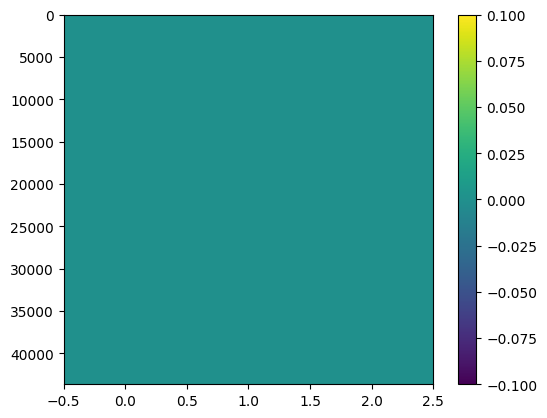

In [18]:
values = miss_info_fake_df.isnull()
h, w = values.shape

fig, ax = plt.subplots()
plt.imshow(values)
plt.colorbar()
ax.set_aspect(w/h)
plt.show()

As you can tell from the heatmap, there are no nulls in the culumns.

In [19]:
miss_info_fake_df.isna().sum()

ID       0
text     0
label    0
dtype: int64

No null values to drop.

## Duplicate Content

In [20]:
miss_info_fake_df["text"].duplicated().sum()

9564

We have 9564 duplicate articles.

In [21]:
values = miss_info_fake_df[miss_info_fake_df["text"].duplicated()]
display(values.tail())

,ID,text,label
43632,44417,"In the village of Starychi, a man’s body was f...",fake
43633,44418,"In the village of Starychi, a man’s body was f...",fake
43634,44419,"In the village of Starychi, a man’s body was f...",fake
43635,44420,"In the village of Starychi, a man’s body was f...",fake
43640,44425,The European Parliament falsifies history by d...,fake


As you can see, articles with IDs in ["44417", "44418", "44419", "44420"] contain the same content.

## Data Cleaning

### Remove Duplicates

In [22]:
miss_info_fake_df.drop_duplicates(subset='text', inplace=True)
display(miss_info_fake_df["text"].duplicated().sum())
display(miss_info_fake_df.shape)

0

(34078, 3)

## WordClouds

WordClouds provide an informative visual to show the frequency of a word in mass of text. I am going to generate two WordClouds, one from the titles of successful projects and the other from the titles of failed projects.  I think that the title of a project could be a useful predictor, because the title is the first (and sometimes only) chance to grab a reader's attention if they are just scrolling on their Facebook feed.

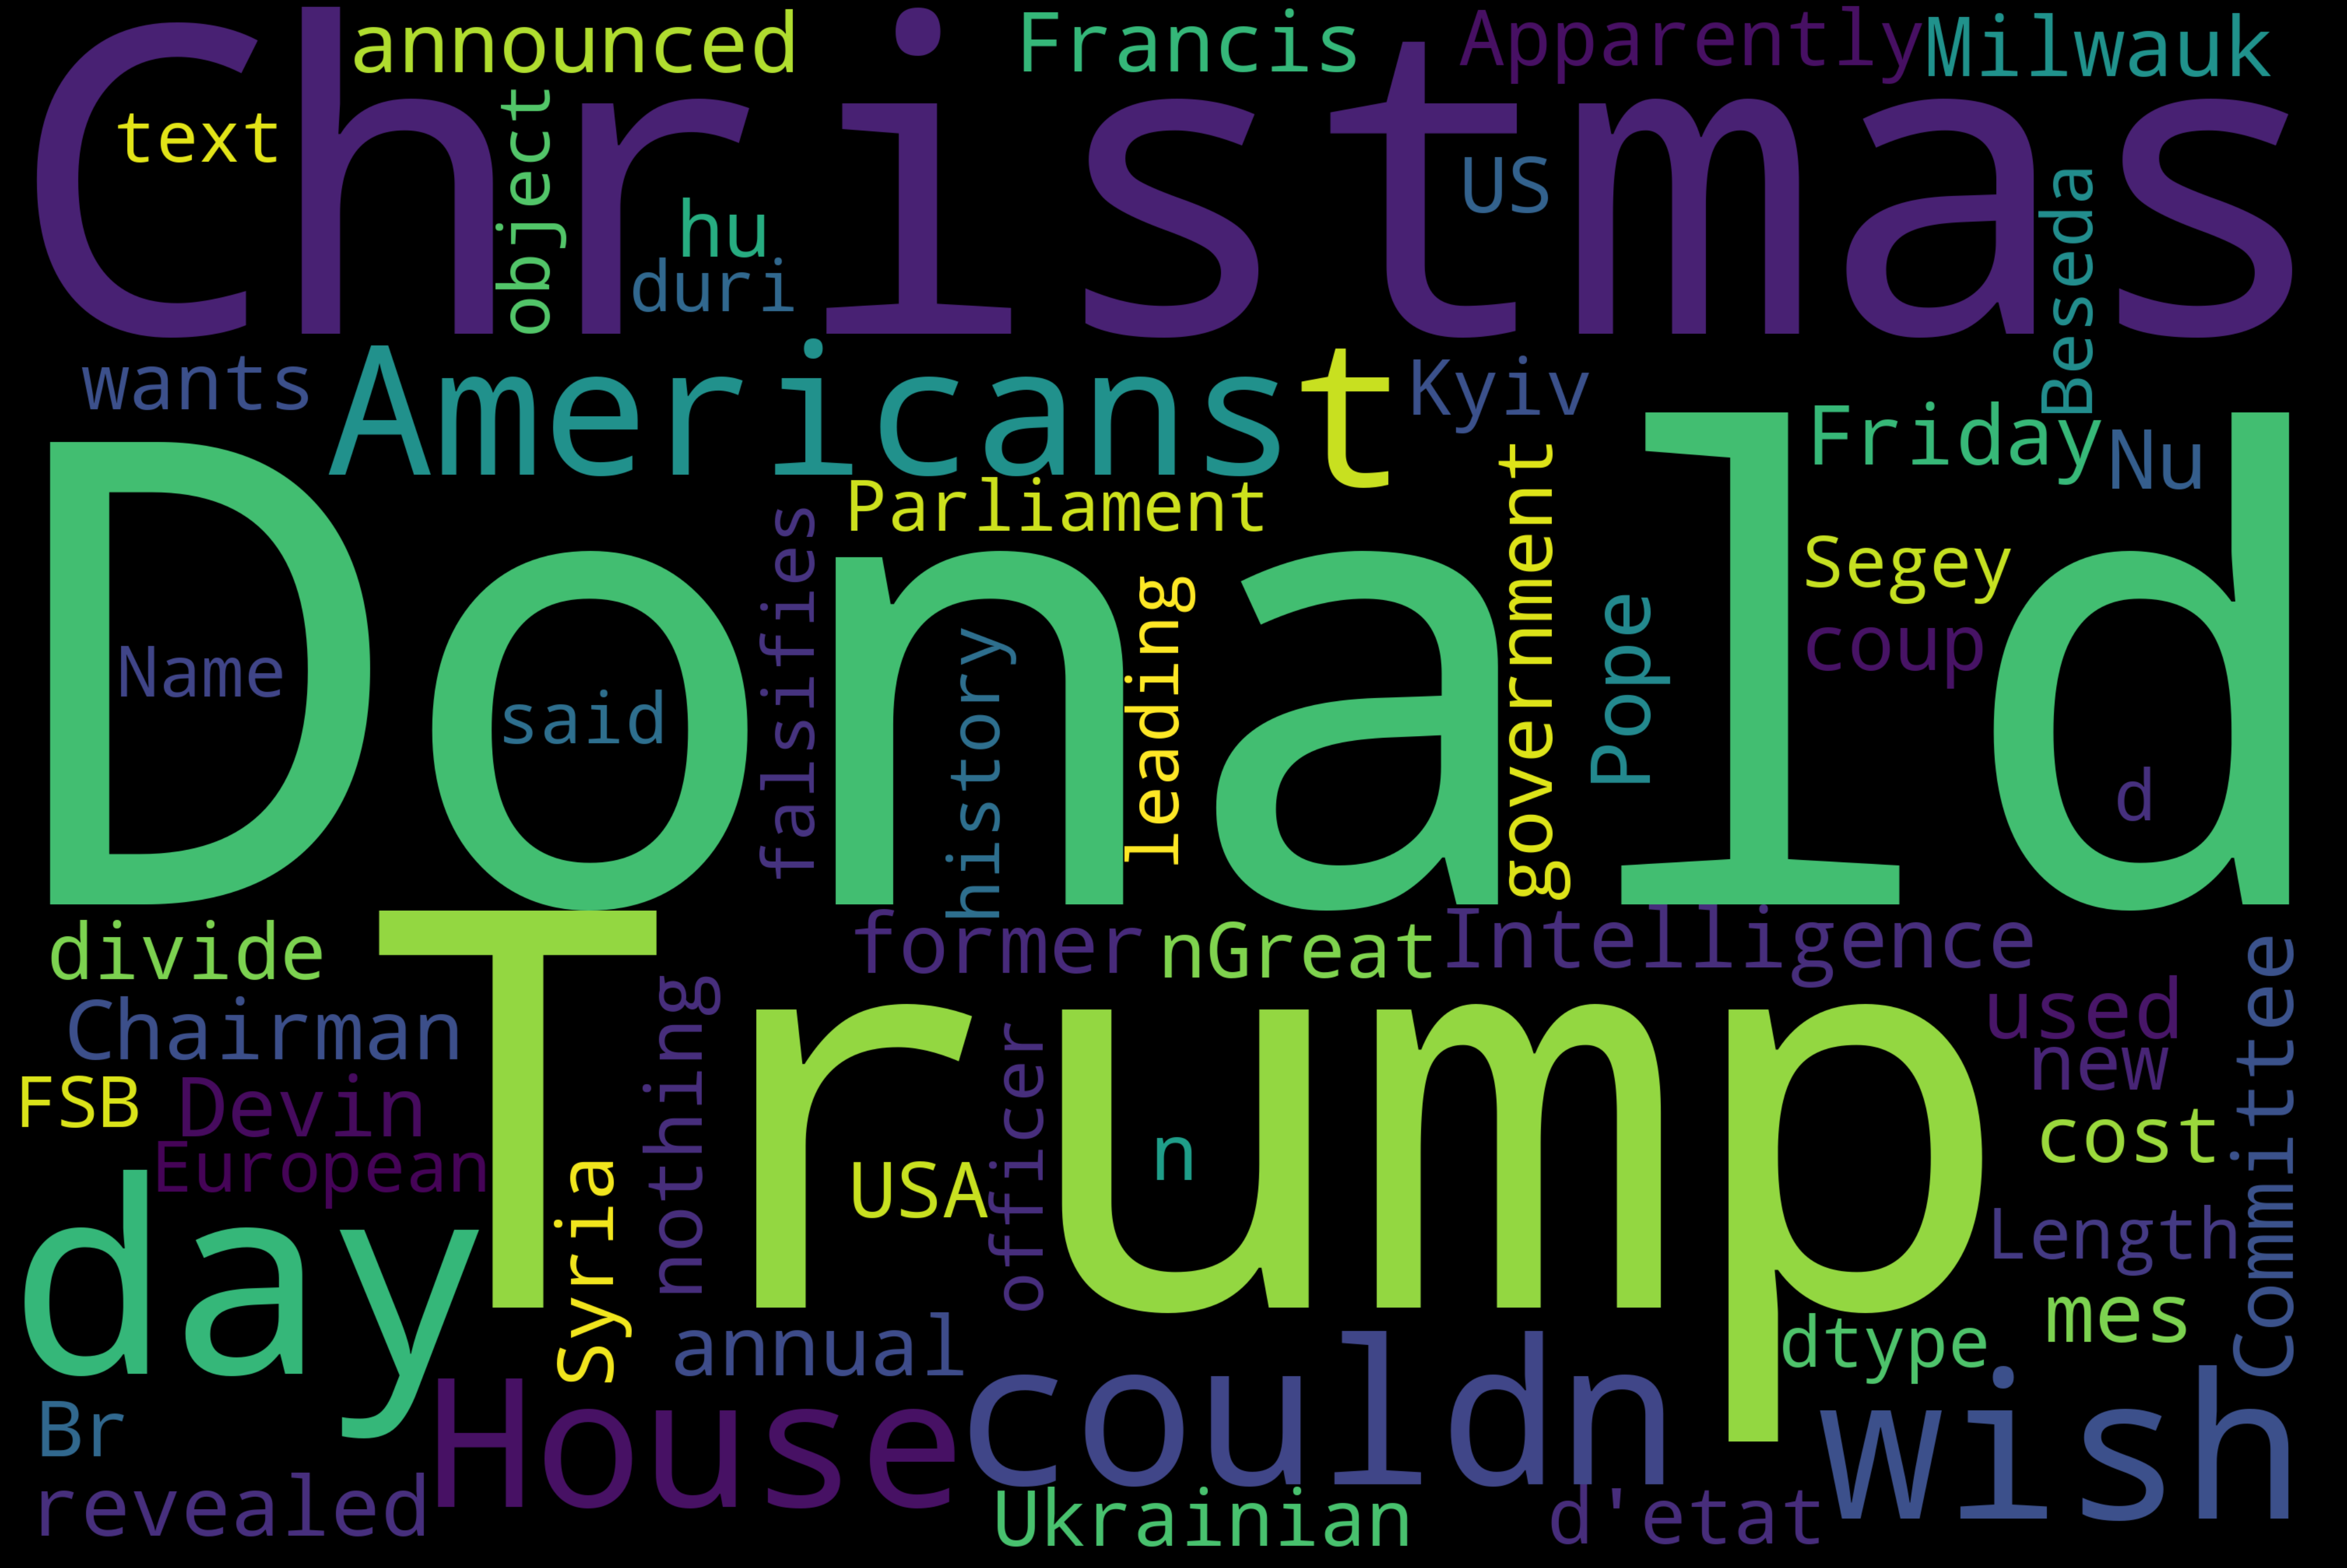

In [23]:
text = miss_info_fake_df.text

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words = 150,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Looks like the words "Donald" and "Trump" are the most frequently used words. A lot of the words that follow are words that are associated with the president of the USA.

## Import the second data set

In [24]:
miss_info_true_path = 'data-set/DataSet_Misinfo_TRUE.csv'
miss_info_true_df = pd.read_csv(miss_info_fake_path)
miss_info_true_df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
# Add a new column to mark this data as Real or Fake
miss_info_true_df["label"] = "real"
display(miss_info_true_df.head())

,ID,text,label
0,0,Donald Trump just couldn t wish all Americans ...,real
1,1,House Intelligence Committee Chairman Devin Nu...,real
2,2,"On Friday, it was revealed that former Milwauk...",real
3,3,"On Christmas day, Donald Trump announced that ...",real
4,4,Pope Francis used his annual Christmas Day mes...,real


## Duplicate Content

In [25]:
display(miss_info_true_df["text"].duplicated().sum())
values = miss_info_true_df[miss_info_true_df["text"].duplicated()]
display(values.tail())

9564

,ID,text,label
43632,44417,"In the village of Starychi, a man’s body was f...",real
43633,44418,"In the village of Starychi, a man’s body was f...",real
43634,44419,"In the village of Starychi, a man’s body was f...",real
43635,44420,"In the village of Starychi, a man’s body was f...",real
43640,44425,The European Parliament falsifies history by d...,real


AS you can see, articles with IDs in ["44417", "44418", "44419", "44420"] contain the same content.

## Data Cleaning

### Remove Duplivates

In [26]:
miss_info_true_df.drop_duplicates(subset='text', inplace=True)
display(miss_info_true_df["text"].duplicated().sum())
display(miss_info_true_df.shape)

0

(34078, 3)

## Merging Both Datasets

In [27]:
all_articles_df = pd.concat([miss_info_true_df,miss_info_fake_df],ignore_index=True)
display(all_articles_df.head())
display(all_articles_df.tail())

,ID,text,label
0,0,Donald Trump just couldn t wish all Americans ...,real
1,1,House Intelligence Committee Chairman Devin Nu...,real
2,2,"On Friday, it was revealed that former Milwauk...",real
3,3,"On Christmas day, Donald Trump announced that ...",real
4,4,Pope Francis used his annual Christmas Day mes...,real


,ID,text,label
68151,44421,"Apparently, the new Kyiv government is in a hu...",fake
68152,44422,The USA wants to divide Syria.\r\n\r\nGreat Br...,fake
68153,44423,The Ukrainian coup d'etat cost the US nothing ...,fake
68154,44424,The European Parliament falsifies history by d...,fake
68155,44426,"A leading FSB officer, Segey Beseda, said duri...",fake


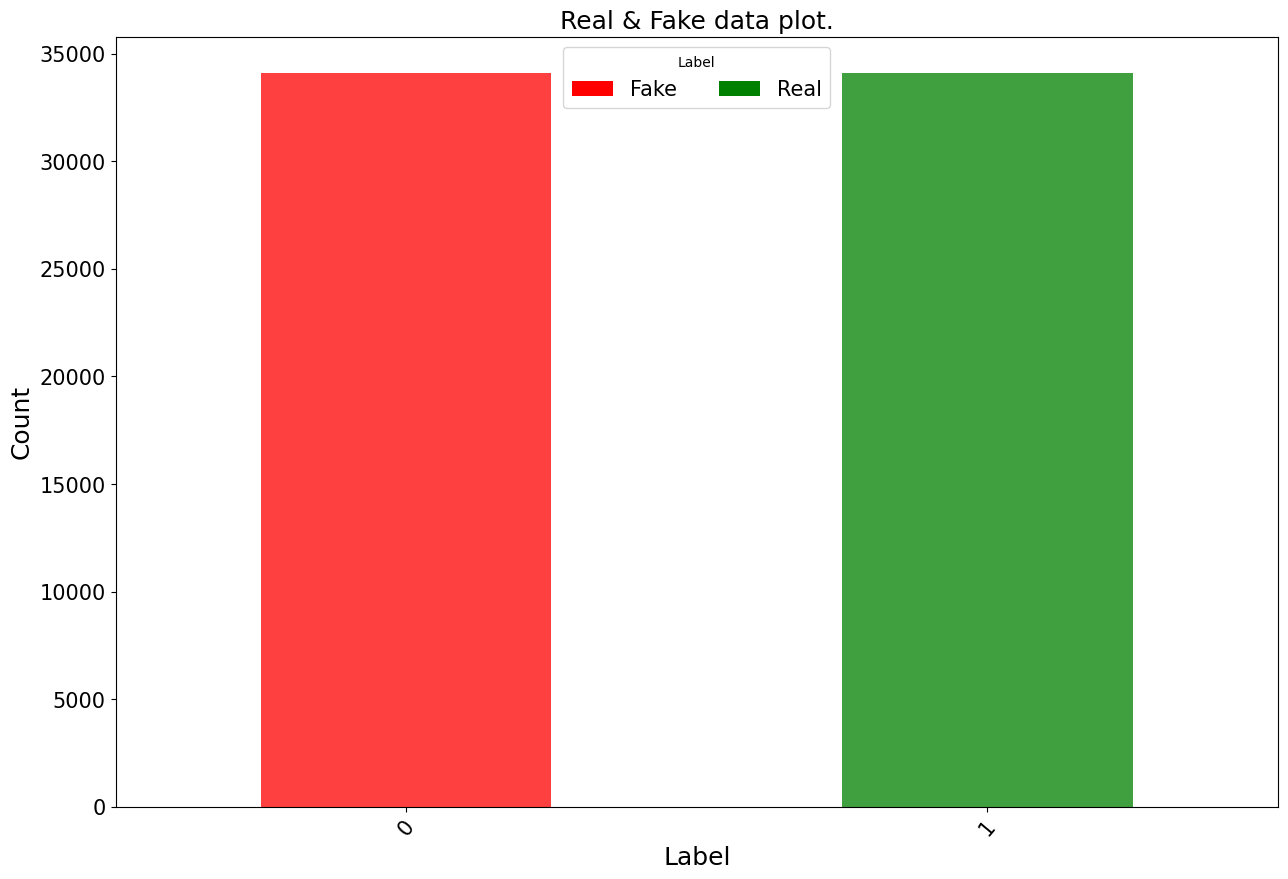

In [28]:
miss_info_true_total = miss_info_true_df.label.shape[0]
miss_info_fake_total = miss_info_fake_df.label.shape[0]
miss_info_total_pd = pd.DataFrame ([miss_info_fake_total, miss_info_true_total], columns = ['label']).reset_index()
ax = miss_info_total_pd.plot(x='index',y="label",use_index=True,
                       figsize=(15,10),kind='bar',color = ['red', 'green'],fontsize=15, alpha=0.75, rot=50)
ax.set_title("Real & Fake data plot.", fontsize=18)
ax.set_xlabel("Label", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
ax.legend(
    [
        Patch(facecolor="red"),
        Patch(facecolor="green")
    ], ["Fake", "Real"], loc='upper center', ncol=2, title="Label", fontsize=15
)
plt.show()

As you can see, the dataset we have is very balanced, and hence working on it is pretty straightforward. We do not need to work on making this dataset more balanced, and can safely assume this is a balanced dataset. This makes our job much easier, and we can focus on other aspects of our analysis.

### Add Words Count Column

In [29]:
all_articles_df['words_count'] = all_articles_df["text"].apply(lambda text: len(text.split()))
# For XGBoost Classifier
all_articles_df['label'] = all_articles_df['label'].replace(['fake'], 0)
all_articles_df['label'] = all_articles_df['label'].replace(['real'], 1)
all_articles_df = all_articles_df.replace(r'^\s*$', np.nan, regex=True)
all_articles_df.dropna(subset=['text'], inplace=True)
# TODO: russian_propaganda_df['words_count'] = russian_propaganda_df["text"].apply(lambda text: len(text.split()) if isinstance(text, str) else 0)

## NLP & ML

### Data Sampling

Since the data is too big, we can sample 10000 rows from the whole dataset.

In [30]:
articles_sample_df = all_articles_df.sample(10000).reset_index(drop='index').drop(columns=['ID', 'words_count'])
articles_sample_df

,text,label
0,You are here: Home / *Articles of the Bound* /...,0
1,Why We Are Still In ‘The Danger Zone’ Until Ja...,0
2,0 комментариев 2 поделились Фото: Fotodom.ru/К...,0
3,Italian Foreign Minister Paolo Gentiloni calle...,0
4,Here is the FULL Episode #9 of this podcast ...,0
...,...,...
9995,Meryl Streep has certainly proven herself capa...,0
9996,The EU is not accountable to national governme...,0
9997,"Zero Hedge In a shocking development, late o...",1
9998,It apparently wasn t shocking enough when the ...,0


## Lemmatization

<figure style="text-align:center;">
<img src="https://images.unsplash.com/photo-1563509769909-174be967b5df?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8bGluZ3Vpc3RpY3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60" loading="lazy">
<figcaption style="padding-top:20px;padding-bottom:10px;">Photo by <a href="https://unsplash.com/@edurnetx?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Edurne Tx</a> on <a href="https://unsplash.com/photos/5Z8mR4vqJD4?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></figcaption>
</figure>
  
[**Word lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation) is a natural language processing process that seeks to reduce a word down to its root form. It’s an important part of language understanding and is used extensively in text analysis and machine learning. By reducing words to their base, or lemma, form, you can more easily identify the same words in different forms, such as verb conjugations or other forms of stems.

For example, the word “running” can be reduced to its lemma, “run.” This is a beneficial process for machine learning tasks as it reduces the amount of data needed to be processed and increases accuracy by reducing the risk of errors caused by variations in grammar or spelling. Additionally, grouping similar words together helps machines interpret the meaning of sentences better when developing natural language processing models.

Lemmatization is also useful for other areas of NLP such as sentiment analysis and topic modeling. In sentiment analysis, it helps identify all forms of a word so more accurate results can be obtained from the model. For example, if a sentence contains both "run" and "running," it may be interpreted as having different sentiments depending on which one is used. By using lemmatization, both words would have the same sentiment value assigned to them and therefore improve the accuracy of sentiment analysis models.

In our case, lemmatization helps us identify relevant topics within large bodies of text by clustering together similar words that could indicate a topic or theme. This allows machines to accurately interpret topics simply by analyzing the text without needing manual tagging or input from humans.

## Parallelism

<figure style="text-align:center;">
<img src="https://cdn.pixabay.com/photo/2013/07/13/11/42/circuit-158499_960_720.png" loading="lazy">
<figcaption style="padding-top:20px;padding-bottom:10px;">Image by <a href="https://pixabay.com/users/openclipart-vectors-30363/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=158499">OpenClipart-Vectors</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=158499">Pixabay</a></figcaption>
</figure>

Lemmatization can be a time-consuming process. However, we can speed up this task by utilizing [**parallelism**](https://en.wikipedia.org/wiki/Parallelism) to our advantage. This involves dividing the extensive dataset into smaller sections and performing lemmatization on each segment simultaneously. By executing multiple instances of the lemmatizer concurrently, we can significantly reduce completion time.

Parallel lemmatization allows us to fully leverage modern computer architectures by utilizing numerous threads or cores for running tasks in parallel mode. With this technique, large datasets are broken down into manageable chunks that get processed at once efficiently without any bottlenecks occurring during execution - making better use of resources while reducing overall processing times dramatically! Additionally, it ensures optimal data handling practices throughout all stages of operation ensuring maximum efficiency is achieved every step along the way with no loss in quality whatsoever!

## Parallel Lemmatization

In [31]:
word_lemmatizer = WordNetLemmatizer()
# TODO: porter_stemmer = PorterStemmer()
corpus = []

# split main dataframe into cpu_count chuncks
articles_sample_chunks = np.array_split(articles_sample_df, cpu_count() - 1)


@lru_cache(maxsize=10000)
def lemmatize(word):
    return word_lemmatizer.lemmatize(word)


def create_corpus(articles_sample_chunk):
    local_corpus = []
    for i in np.arange(len(articles_sample_chunk)):
        line = re.sub(r"[^a-zA-Z]", " ", articles_sample_chunk.iloc[i]["text"])
        line = line.lower().split()
        line = [
            lemmatize(word)
            for word in line
            if word not in stopwords.words("english") and len(word) > 1
        ]
        if len(line) > 1:
            local_corpus.append(" ".join(line))
    return local_corpus


with ProcessPoolExecutor() as executor:
    jobs = [executor.submit(create_corpus, chunk) for chunk in articles_sample_chunks]
    for job in tqdm(as_completed(jobs), total=len(jobs)):
        corpus_result = job.result()
        corpus.extend(corpus_result)

100%|█████████████████████████████████████████████| 7/7 [02:23<00:00, 20.44s/it]


In [32]:
len(corpus)

9976

In [33]:
x = np.array(corpus)
y = articles_sample_df[:len(corpus)]["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

display(x[0], y[0], x_train.shape, x_test.shape, y_train.shape, y_test.shape)

my_tfidf = TfidfVectorizer(max_features=30000, stop_words='english', max_df=0.8)

x_train = my_tfidf.fit_transform(x_train).toarray()
x_test = my_tfidf.transform(x_test).toarray()

'home article bound trump survive medium onslaught trump survive medium onslaught november pm cliff kincaid leave comment accuracy medium cnn msnbc depicting incoming trump administration advent fourth reich obvious president elect go beyond blistering tweet cultivating sympathetic medium getting message systematic way trump transition team job president obama ahead curve regard established office progressive medium online response cooperate progressive medium source hillary clinton presidential campaign understood form outreach well saw wikileaks disclosure colluded major medium outlet reporter trump used tweet meeting press official statement occasional video much needed president elect hope survive transition team power get thing done communicate directly american people addition trump tweet serve legitimate purpose president elect consider position comparable obama administration albeit focus conservative alternative news medium trump appears great confidence dan scavino carry titl

0

(7980,)

(1996,)

(7980,)

(1996,)

## Modelling

In [40]:
train_scores = []
test_scores = []
CV = []


def train_visualize(model):
    model.fit(x_train, y_train)
    train_model_score = model.score(x_train, y_train)
    train_scores.append(round(train_model_score, 2))
    y_pred_train = model.predict(x_train)
    test_model_score = model.score(x_test, y_test)
    test_scores.append(round(test_model_score, 2))
    y_pred_test = model.predict(x_test)
    cross_val = cross_val_score(model, x_train, y_train, cv=10)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    print("Train score :", round(train_model_score, 2))
    print("Test score :", round(test_model_score, 2))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 2))
    df_model = pd.DataFrame(
        classification_report(y_pred_test, y_test, digits=2, output_dict=True)
    ).T
    df_model["support"] = df_model.support.apply(int)
    df_model.style.background_gradient(cmap="viridis", subset=pd.IndexSlice["0":"9", :"f1-score"])
    display(df_model)
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    plt.imshow(conf_matrix, cmap="viridis", alpha=0.8)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large")
    h, w = conf_matrix.shape
    plt.colorbar()
    ax.set_aspect(w / h)
    plt.xlabel("Predictions", fontsize=18)
    plt.ylabel("Actuals", fontsize=18)
    plt.title("Confusion Matrix", fontsize=18)
    plt.show()

### Gaussian NB

Train score : 0.94
Test score : 0.51
Train CV scores : [0.52315394 0.4893617  0.49687109 0.51939925 0.48245614 0.51253133
 0.5075188  0.49874687 0.46365915 0.5075188 ]
Train CV mean : 0.5


,precision,recall,f1-score,support
0,0.488706,0.494802,0.491736,962
1,0.524462,0.518375,0.521401,1034
accuracy,0.507014,0.507014,0.507014,0
macro avg,0.506584,0.506589,0.506568,1996
weighted avg,0.507229,0.507014,0.507103,1996


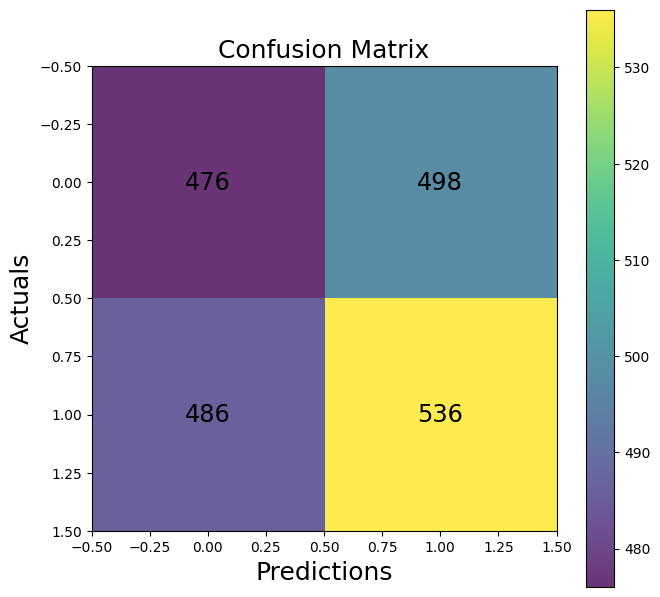

In [41]:
model=GaussianNB()
train_visualize(model)

### Bernoulli NB

Train score : 0.85
Test score : 0.51
Train CV scores : [0.48621554 0.5112782  0.48997494 0.45989975 0.48746867 0.49874687
 0.48621554 0.49373434 0.49498747 0.46173149]
Train CV mean : 0.49


,precision,recall,f1-score,support
0,0.567210,0.500449,0.531742,1113
1,0.451135,0.518141,0.482322,882
accuracy,0.508271,0.508271,0.508271,0
macro avg,0.509173,0.509295,0.507032,1995
weighted avg,0.515893,0.508271,0.509893,1995


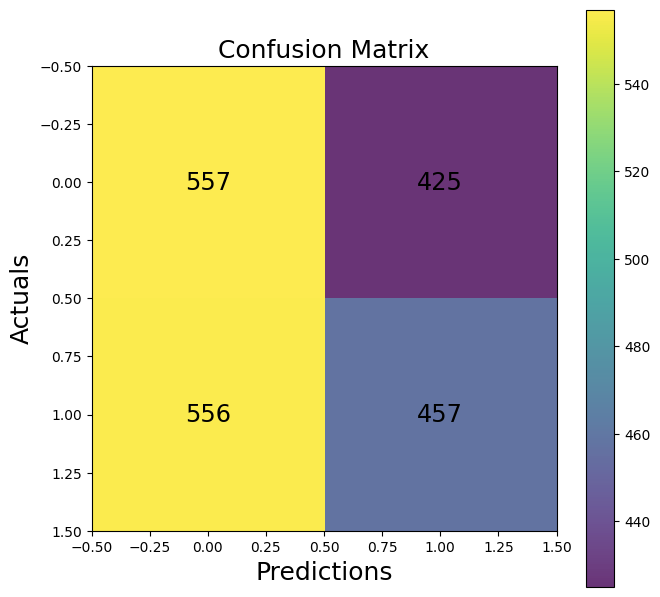

In [36]:
model=BernoulliNB()
train_visualize(model)

### Passive Aggressive Classifier

In [ ]:
model = PassiveAggressiveClassifier(max_iter=1024)
train_visualize(model)

### Random Forest Classifier

In [ ]:
model=RandomForestClassifier()
train_visualize(model)

### Logistic Regression

In [ ]:
model=LogisticRegression(C=3)
train_visualize(model)

### XGBoost Classifier

Train score : 0.89
Test score : 0.5
Train CV scores : [0.51814768 0.47684606 0.51188986 0.50187735 0.49937422 0.52631579
 0.49749373 0.50626566 0.53884712 0.4924812 ]
Train CV mean : 0.51


,precision,recall,f1-score,support
0,0.455090,0.505543,0.478992,902
1,0.551759,0.501370,0.525359,1095
accuracy,0.503255,0.503255,0.503255,0
macro avg,0.503424,0.503457,0.502175,1997
weighted avg,0.508096,0.503255,0.504416,1997


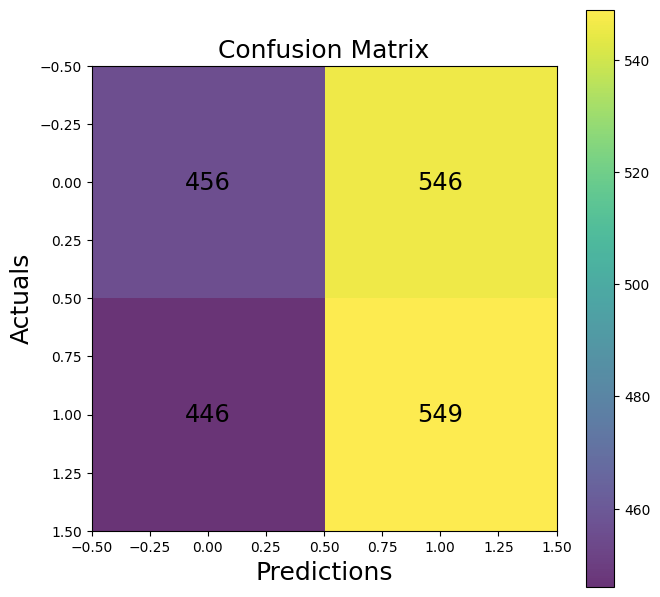

In [37]:
model=XGBClassifier()
train_visualize(model)

In [ ]:
# TODO: test these models
from sklearn.ensemble import (
    AdaBoostClassifier,
    AdaBoostRegressor,
    BaggingClassifier,
    BaggingRegressor,
    ExtraTreesClassifier,
    ExtraTreesRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    HistGradientBoostingClassifier,
    HistGradientBoostingRegressor,
    IsolationForest,
    RandomForestClassifier,
    RandomForestRegressor,
    RandomTreesEmbedding,
    StackingClassifier,
    StackingRegressor,
    VotingClassifier,
    VotingRegressor
)
from sklearn.svm import SVC
from sklearn.svm import SVR

In [ ]:
# TODO
model=BaggingClassifier(estimator=SVC(),n_estimators=10, random_state=0)
train_visualize(modela

In [ ]:
# TODO
model= BaggingRegressor(estimator=SVR(),n_estimators=10, random_state=0)
train_visualize(model)

In [ ]:
model= AdaBoostClassifier(n_estimators=100, random_state=0)
train_visualize(model)

In [ ]:
# TODO
model= AdaBoostRegressor(random_state=0, n_estimators=100)
train_visualize(model)

In [ ]:
# TODO
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
train_visualize(model)

In [ ]:
# TODO
model= GradientBoostingRegressor(random_state=0)
train_visualize(model)

In [ ]:
# TODO
method = [
    "GaussianNB",
    "BernoulliNB",
    "LogisticRegression",
    "RandomForestClassifier",
    "XGBClassifier",
]
results = pd.DataFrame(
    {
        "Model": method,
        "Accuracy(Train)": train_scores,
        "Accuracy(Test)": test_scores,
        "CV score mean(Train)": CV,
    }
)
display(results)

## Vectorize text samples into 2D integer tensor

In [34]:
tokenizer = Tokenizer(num_words=10000)

tokenizer.fit_on_texts(x)

tokenized_train = tokenizer.texts_to_sequences(x)
X_train = pad_sequences(tokenized_train, maxlen=500)

word_index = tokenizer.word_index
print(f"Unique tokens {len(word_index)}. \n NB lines:  {len(x)}.")
tokenized_test = tokenizer.texts_to_sequences(x)
X_test = pad_sequences(tokenized_test, maxlen=500)


def get_embeddings(path):
    wv_from_bin = KeyedVectors.load_word2vec_format(path, binary=True, limit=500000)
    embeddings_index = {}
    for word, vector in zip(wv_from_bin.key_to_index, wv_from_bin.vectors):
        coefs = np.asarray(vector, dtype="float32")
        embeddings_index[word] = coefs
    return embeddings_index


embeddings_index = {}
embeddings_index = get_embeddings("./GoogleNews-vectors-negative300.bin.gz")
print(f"There are {len(embeddings_index)} word vectors.")

Unique tokens 70908. 
 NB lines:  9976.
There are 500000 word vectors.


## Preparing embedding matrix

In [35]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), 300)

## LSTM model

In [36]:
def lstm_nn():
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim=300, weights=[embedding_matrix], input_length=30000, trainable=False))
    model.add(LSTM(units=128 , return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.1))
    model.add(Dense(units = 32 , activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = lstm_nn()
model.summary()

2023-04-03 10:59:35.656228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-04-03 10:59:36.168179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-03 10:59:36.170711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-03 10:59:36.171923: I tensorflow/core/common_runtime/executor.cc

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30000, 300)        21272700  
                                                                 
 lstm (LSTM)                 (None, 30000, 128)        219648    
                                                                 
 dropout (Dropout)           (None, 30000, 128)        0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 3

2023-04-03 10:59:36.370431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_1_grad/concat/split_1/split_dim' with dtype int32
	 [[{{node gradients/split_1_grad/concat/split_1/split_dim}}]]


In [ ]:
model.fit(x_train, y_train, batch_size=256, validation_data=(x, y), epochs=8)

### Save NN Model

In [36]:
import pickle
pickle.dump(model,open('model.pkl', 'wb'))

## Univariate Outlier Analysis

### Box Plot

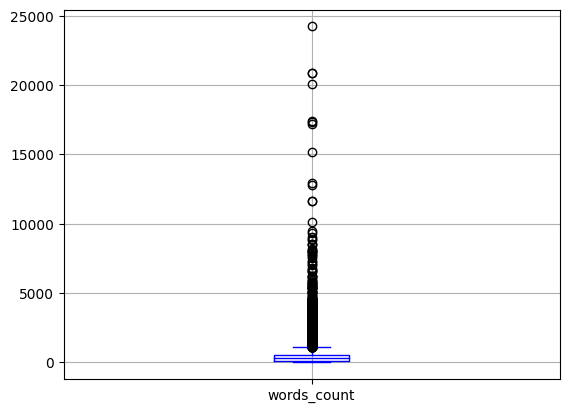

In [34]:
miss_info_true_df['words_count'] = miss_info_true_df["text"].apply(lambda text: len(text.split()))
b_plot = miss_info_true_df.boxplot(column = 'words_count', color = 'blue')
b_plot.plot()
plt.show() 

### Scatter Plot

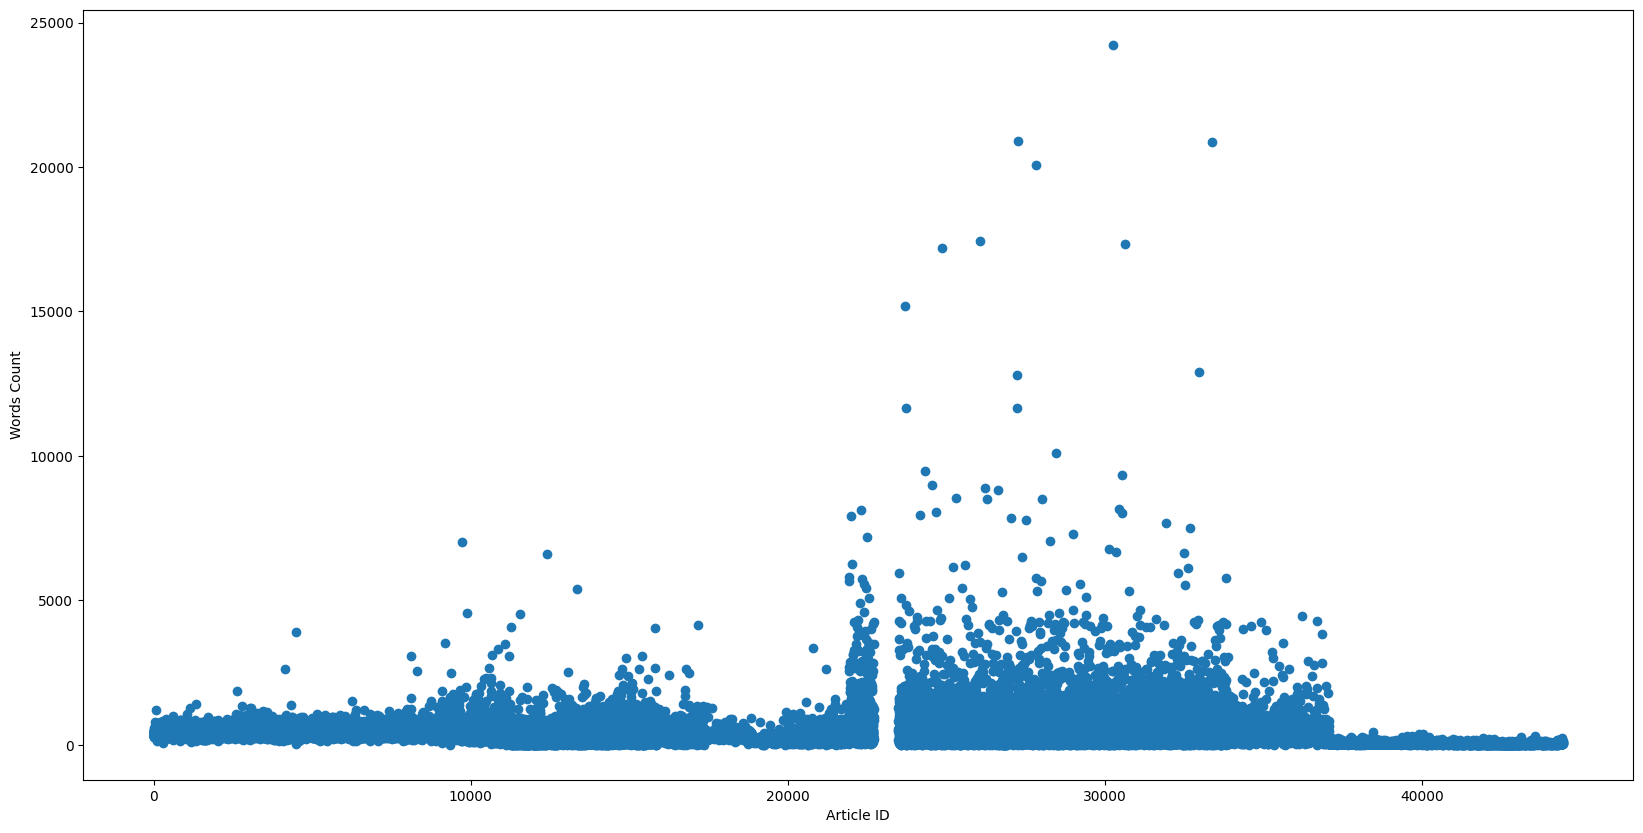

In [35]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(miss_info_true_df['ID'], miss_info_true_df['words_count'])
 
# x-axis label
ax.set_xlabel('Article ID')
 
# y-axis label
ax.set_ylabel('Words Count')
plt.show()

The boxplot under consideration offers a profound insight into the distribution of article word count. The presence of numerous outliers in terms of the number of words used is immediately apparent, indicating that certain articles have significantly more or fewer words than what would be considered typical for an average piece.

In order to remove these outliers, we need to compute the **[interquartile range](https://en.wikipedia.org/wiki/Interquartile_range)** which is a measure of how spread out data is. It is calculated by taking the difference between the upper and lower quartiles. The upper quartile is the median of the upper half of the data, and the lower quartile is the median of the lower half of the data.

In [36]:
Q1 = miss_info_true_df['words_count'].quantile(0.25) #lower (first) quartile
Q2 = miss_info_true_df['words_count'].median() # median (second quartile)
Q3 = miss_info_true_df['words_count'].quantile(0.75) #upper (third) quartile
IQR = Q3-Q1 #interquartile range

print(" Q1 =" ,Q1,"\n","Q2 =",Q2,"\n","Q3 =",Q3,"\n","IQR =",IQR)

 Q1 = 97.0 
 Q2 = 331.0 
 Q3 = 509.0 
 IQR = 412.0


In [37]:
low_wh = abs(Q1-1.5*IQR)
upper_wh = Q3+1.5*IQR

print(" lower whisker =" ,low_wh,"\n","upper whisker =",upper_wh)

 lower whisker = 521.0 
 upper whisker = 1127.0


In [38]:
#outlier values
miss_info_true_df['words_count'][(miss_info_true_df['words_count']<low_wh) | (miss_info_true_df['words_count']>upper_wh)]

0        495
1        305
3        444
4        420
5        312
        ... 
43636     30
43637     72
43638    106
43639    132
43641     55
Name: words_count, Length: 27974, dtype: int64

In [39]:
t_df = miss_info_true_df['words_count'][~((miss_info_true_df['words_count']<(low_wh)) | (miss_info_true_df['words_count']>(upper_wh)))] #outliers filtered

In [40]:
t_df

2        580
38       652
39       522
54       562
57       565
        ... 
36186    640
36199    646
36220    831
36264    836
36271    640
Name: words_count, Length: 6104, dtype: int64

### Box Plot

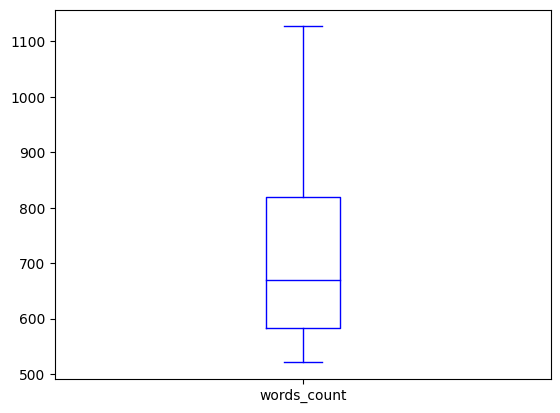

In [41]:
b_plot = t_df.plot.box(column = 'words_count', color = 'blue')
b_plot.plot()
plt.show() 

### Scatter Plot

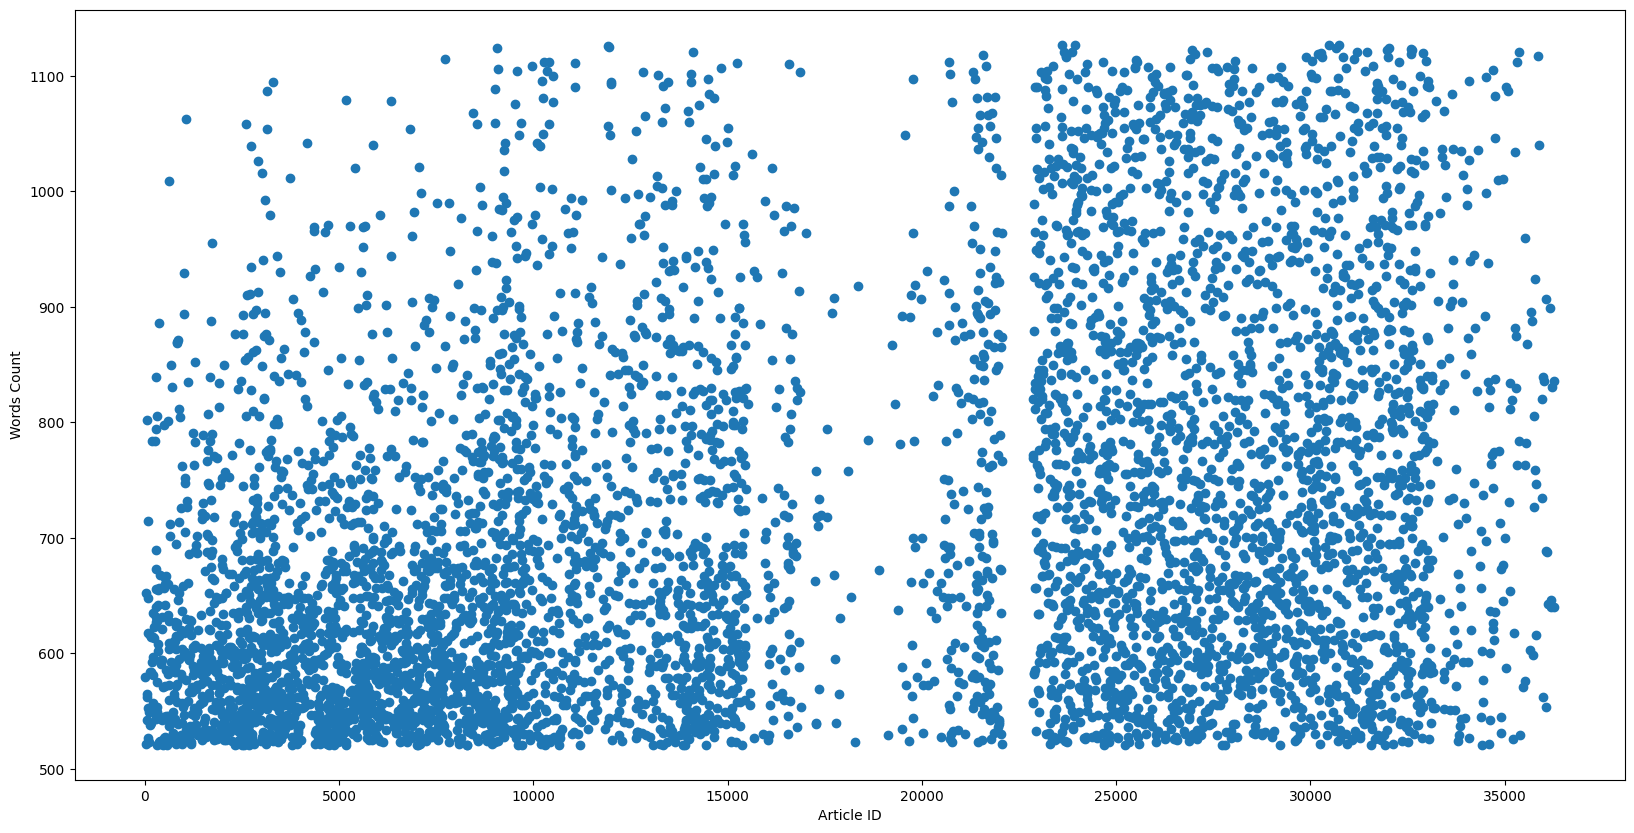

In [42]:
fig, ax = plt.subplots(figsize = (20,10))
new_df = t_df.reset_index()
ax.scatter(new_df["index"], new_df["words_count"])
 
# x-axis label
ax.set_xlabel('Article ID')
 
# y-axis label
ax.set_ylabel('Words Count')
plt.show()

## Average Method

In [43]:
miss_info_true_df['words_count'].mean()

426.675685192793

In [44]:
miss_info_true_copy_df = miss_info_true_df.copy()
miss_info_true_copy_df['words_count'][(miss_info_true_copy_df['words_count']<(low_wh)) | (miss_info_true_copy_df['words_count']>(upper_wh))] = miss_info_true_copy_df['words_count'].mean()

/tmp/ipykernel_170053/2048327539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_info_true_copy_df['words_count'][(miss_info_true_copy_df['words_count']<(low_wh)) | (miss_info_true_copy_df['words_count']>(upper_wh))] = miss_info_true_copy_df['words_count'].mean()


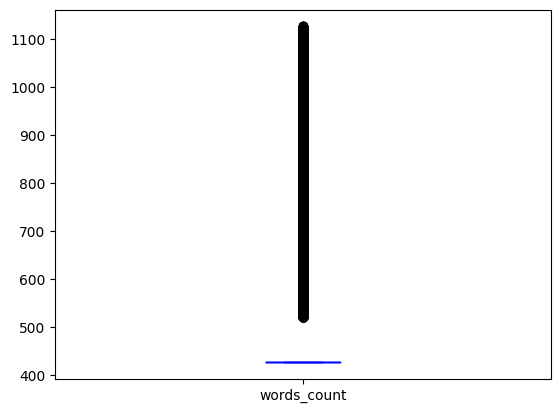

In [45]:
b_plot = miss_info_true_copy_df.plot.box(column = 'words_count', color = 'blue')
b_plot.plot()
plt.show() 

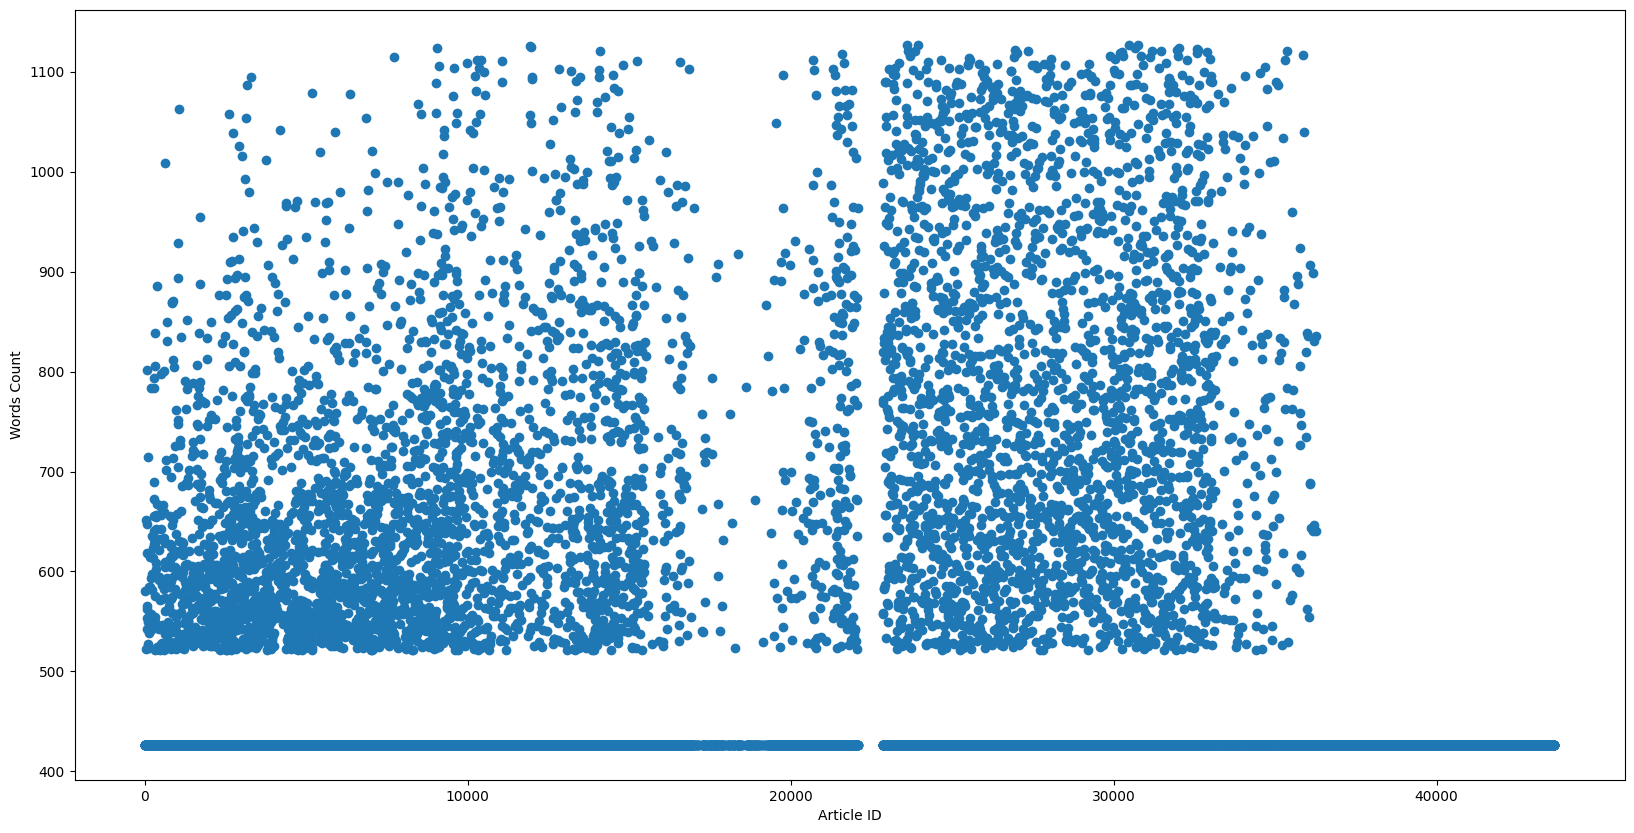

In [46]:
fig, ax = plt.subplots(figsize = (20,10))
new_df = miss_info_true_copy_df.reset_index()
ax.scatter(new_df["index"], new_df["words_count"])
 
# x-axis label
ax.set_xlabel('Article ID')
 
# y-axis label
ax.set_ylabel('Words Count')
plt.show()

In [47]:
miss_info_true_copy_df['words_count'][(miss_info_true_copy_df['words_count']<(low_wh)) | (miss_info_true_copy_df['words_count']>(upper_wh))]

0        426.675685
1        426.675685
3        426.675685
4        426.675685
5        426.675685
            ...    
43636    426.675685
43637    426.675685
43638    426.675685
43639    426.675685
43641    426.675685
Name: words_count, Length: 27974, dtype: float64

## Pressure Method

In [48]:
miss_info_true_copy_df = miss_info_true_df.copy()
miss_info_true_copy_df['words_count'][miss_info_true_copy_df['words_count']<(low_wh)] = low_wh

/tmp/ipykernel_170053/980051688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_info_true_copy_df['words_count'][miss_info_true_copy_df['words_count']<(low_wh)] = low_wh


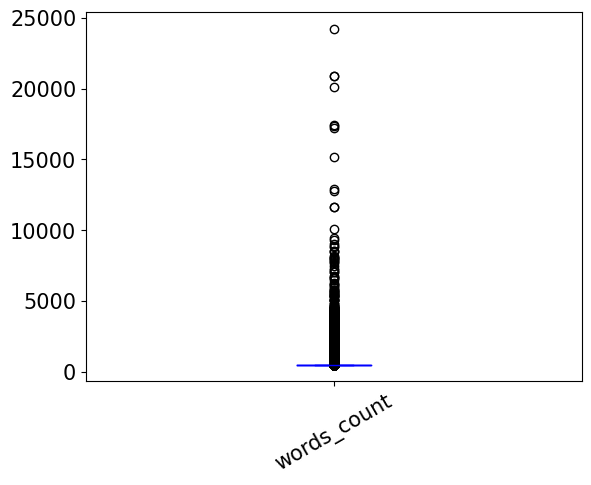

In [49]:
b_plot = miss_info_true_copy_df.plot.box(column = 'words_count', color = 'blue',fontsize=15, rot=30);
b_plot.plot()
plt.show() 

### Scatter Plot

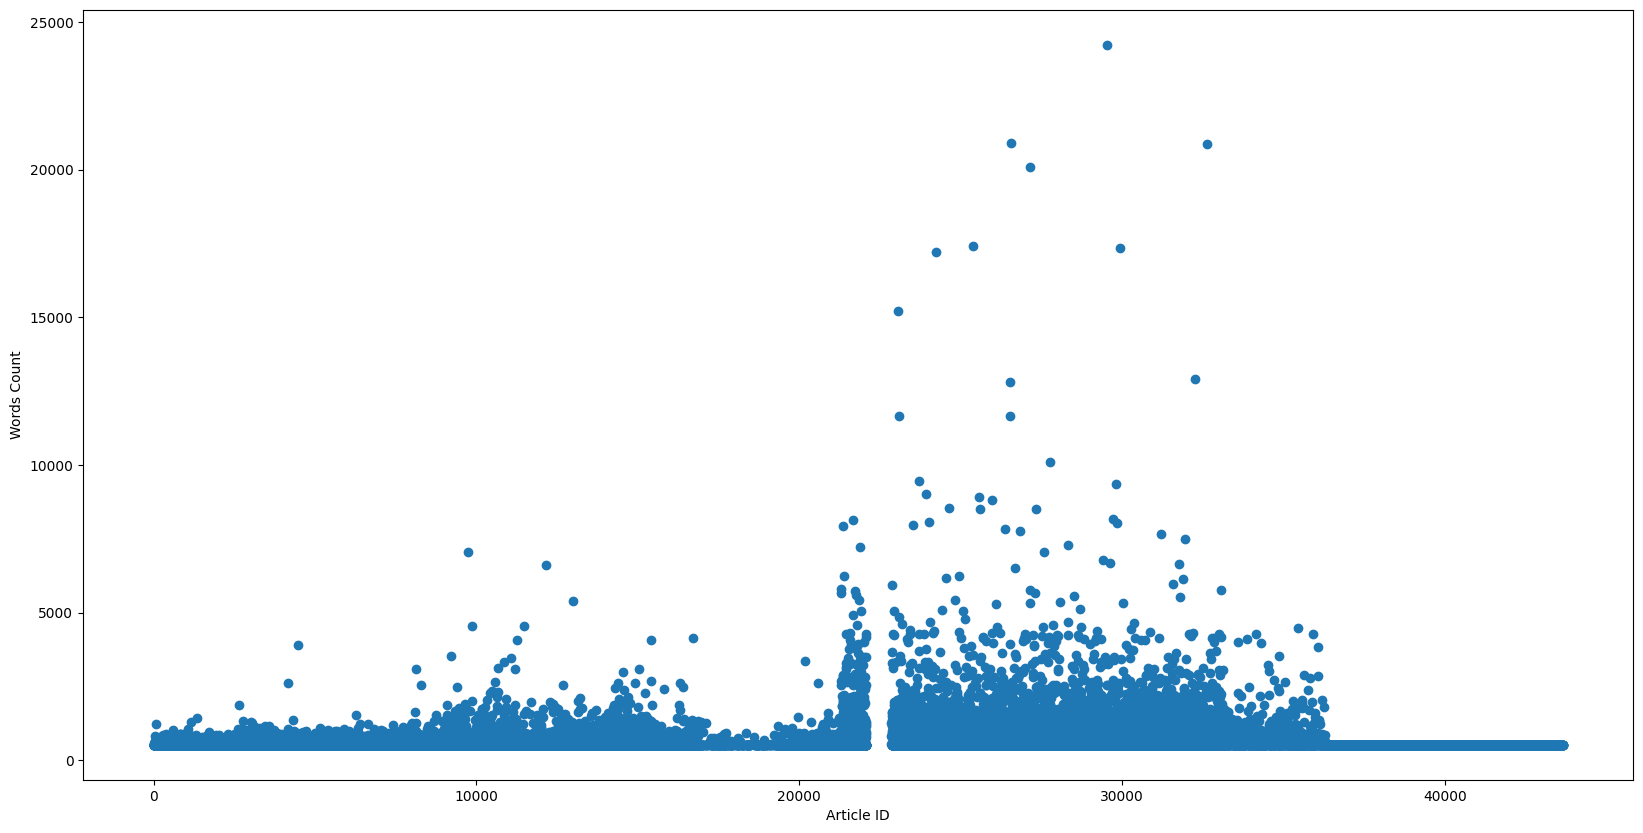

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
new_df = miss_info_true_copy_df.reset_index()
ax.scatter(new_df["index"], new_df["words_count"])
 
# x-axis label
ax.set_xlabel('Article ID')
 
# y-axis label
ax.set_ylabel('Words Count')
plt.show()

### Histogram

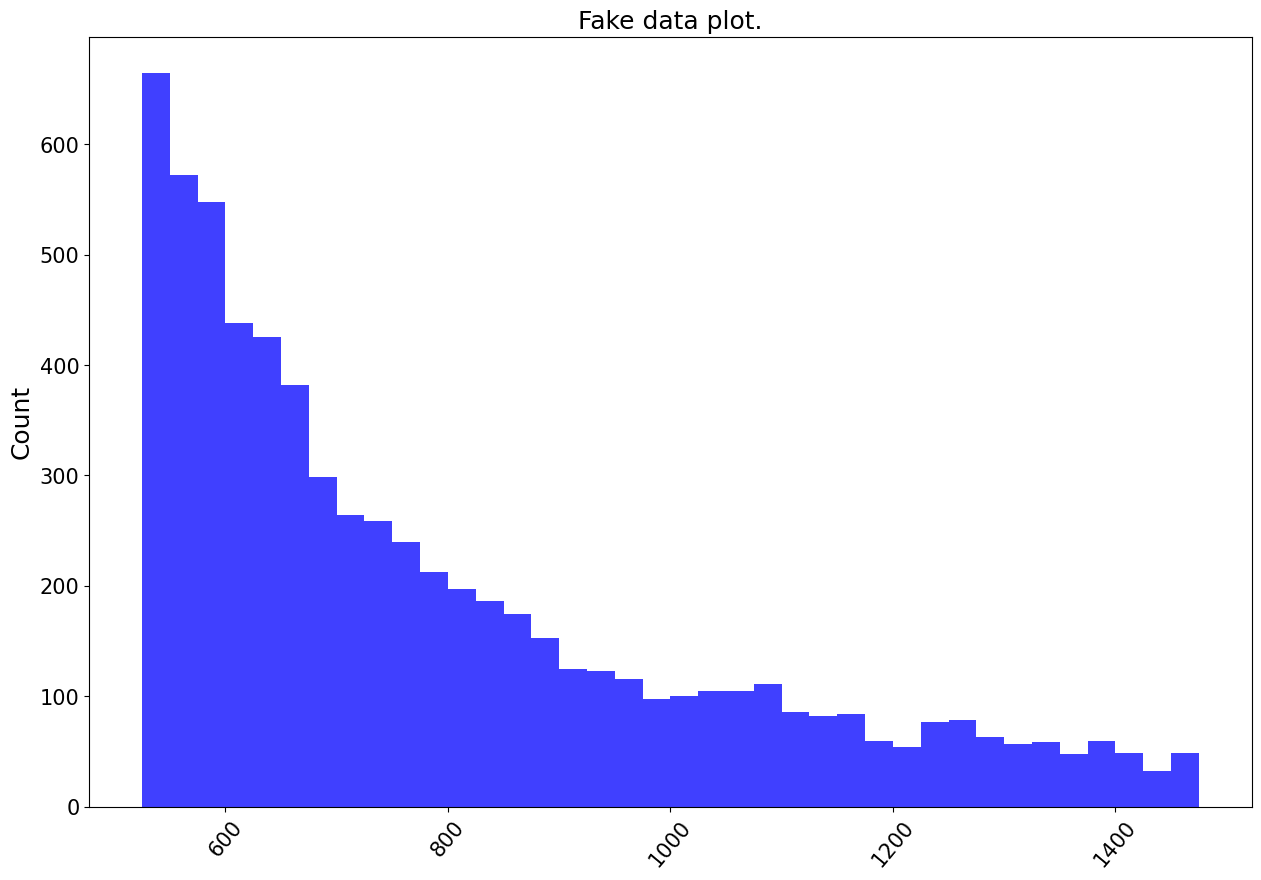

In [54]:
miss_info_fake_df['words_count'] = miss_info_fake_df["text"].apply(lambda text: len(text.split()))
ax = miss_info_fake_df["words_count"].plot.hist(stacked=False, bins=range(525, 1500, 25), figsize=(15,10), color = 'blue',fontsize=15, alpha=0.75, rot=50);
ax.set_title("Fake data plot.", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.show()

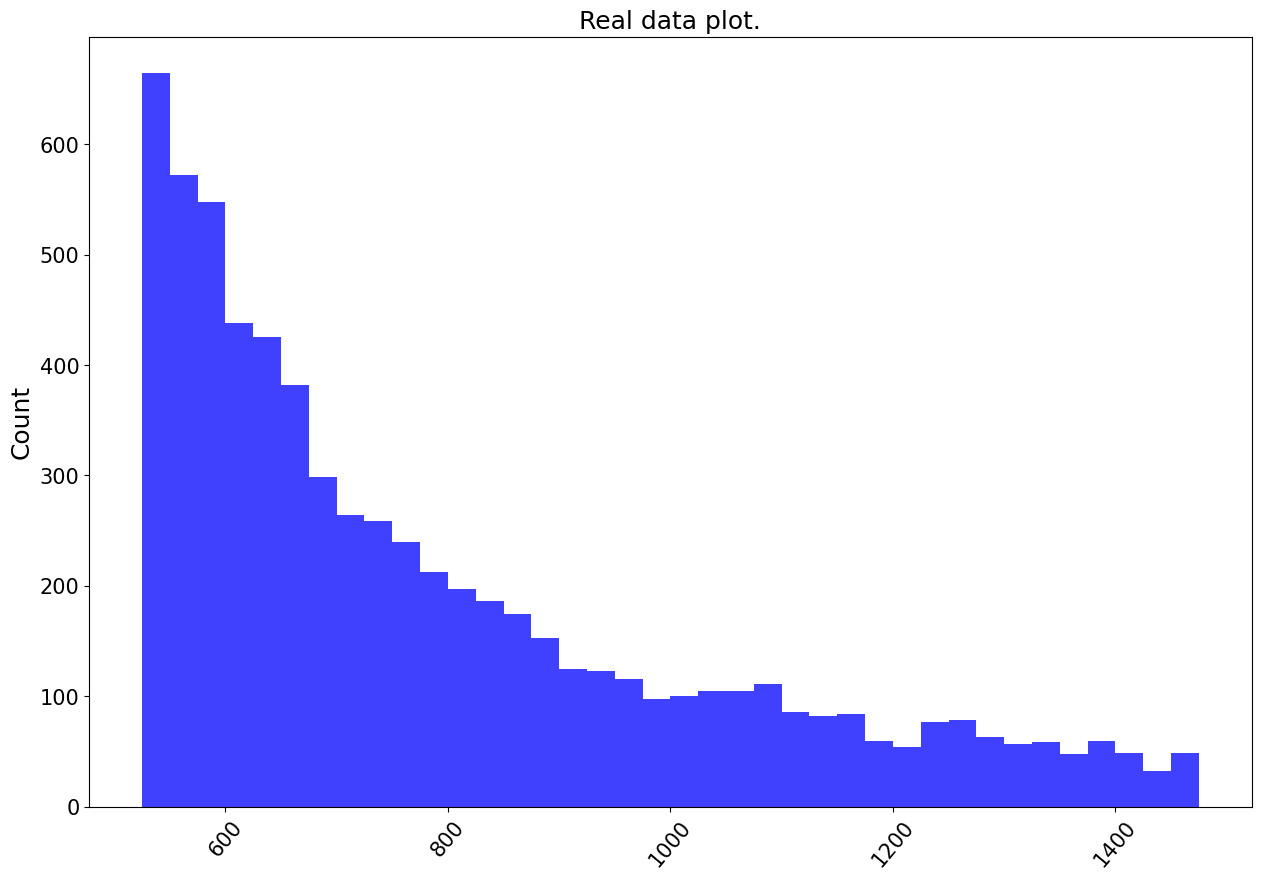

In [55]:
miss_info_true_df['words_count'] = miss_info_true_df["text"].apply(lambda text: len(text.split()))
ax = miss_info_true_df["words_count"].plot.hist(stacked=False, bins=range(525, 1500, 25), figsize=(15,10), color = 'blue',fontsize=15, alpha=0.75, rot=50);
ax.set_title("Real data plot.", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.show()